#### Importing the required packages to Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 60)
pd.options.display.max_colwidth = 200

In [2]:
path = "F:/Upgrad/Loan Dataset/"

#### Setting the low_memory to false will avoid the warning of dtype and will make pandas to determine the datatype of each column in the data frame.

In [3]:
df = pd.read_csv(path+"loan.csv",low_memory = False)

In [4]:
df.shape

(39717, 111)

In [5]:
#Checing the head of the data set
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money be...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


Some columns are completely having null values. Dropping some columns from the Data Frame.

In [7]:
null_sum = round((df.isnull().sum()/len(df.index))*100).reset_index(name = "percent")
null_sum_01 = null_sum[null_sum["percent"]>=90]

Identifying the columns which are having more than 90% null values

In [8]:
null_sum_01

,index,percent
29,mths_since_last_record,93.0
47,next_pymnt_d,97.0
50,mths_since_last_major_derog,100.0
53,annual_inc_joint,100.0
54,dti_joint,100.0
55,verification_status_joint,100.0
57,tot_coll_amt,100.0
58,tot_cur_bal,100.0
59,open_acc_6m,100.0
60,open_il_6m,100.0


#### Creating a new dataframe by dropping the null columns

90% of the total columns which are having more that 90% null values has been removed

In [9]:
loan_set = df.drop(null_sum_01["index"],axis = 1)

In [10]:
loan_set.shape

(39717, 55)

#### Removing the rows having loan status as "current" as dont need them for analysis.

In [11]:
loan_set.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

To diplay all the columns in the dataframe increased the max_columns size to 60

In [12]:
loan_set.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money be...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
loan_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

#### Removing the columns which are having a single value in entire dataset and which are of not much use to decide on the loan_status

In [14]:
#Checking the unique values of 'pymnt_plan'
loan_set['pymnt_plan'].unique()

array(['n'], dtype=object)

In [15]:
#Dropping the column 'pymnt_plan'
loan_set = loan_set.drop('pymnt_plan',axis = 1)

In [16]:
#Checking the unique values of 'initial_list_status'
loan_set['initial_list_status'].unique()

array(['f'], dtype=object)

In [17]:
#Dropping the column 'initial_list_status'
loan_set = loan_set.drop('initial_list_status',axis = 1)

In [18]:
#Checking the unique values of 'collections_12_mths_ex_med'
loan_set['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [19]:
#Dropping the column 'collections_12_mths_ex_med'
loan_set = loan_set.drop('collections_12_mths_ex_med',axis = 1)

In [20]:
#Checking the unique values of 'policy_code' 
loan_set['policy_code' ].unique()

array([1], dtype=int64)

In [21]:
#Dropping the column policy_code
loan_set = loan_set.drop('policy_code' ,axis = 1)

In [22]:
#Checking the unique values of  'application_type'
loan_set[ 'application_type' ].unique()

array(['INDIVIDUAL'], dtype=object)

In [23]:
#Dropping the column  'application_type'
loan_set = loan_set.drop( 'application_type' ,axis = 1)

In [24]:
#Checking the unique values of   'acc_now_delinq'
loan_set[  'acc_now_delinq' ].unique()

array([0], dtype=int64)

In [25]:
#Dropping the column 'acc_now_delinq'
loan_set = loan_set.drop(  'acc_now_delinq' ,axis = 1)

In [26]:
#Checking the unique values of   'chargeoff_within_12_mths'
loan_set[  'chargeoff_within_12_mths' ].unique()

array([ 0., nan])

In [27]:
#Dropping the column 'chargeoff_within_12_mths'
loan_set = loan_set.drop(  'chargeoff_within_12_mths' ,axis = 1)

In [28]:
#Checking the unique values of  'delinq_amnt'
loan_set[  'delinq_amnt' ].unique()

array([0], dtype=int64)

In [29]:
#Dropping the column 'delinq_amnt'
loan_set = loan_set.drop(  'delinq_amnt' ,axis = 1)

In [30]:
#Checking the unique values of  'tax_liens'
loan_set['tax_liens'].unique()

array([ 0., nan])

In [31]:
#Dropping the column 'tax_liens'
loan_set = loan_set.drop( 'tax_liens' ,axis = 1)

#### Dropping id,member_id columns as it is a unique number for each loan application and they don't contribute much for analysis.

In [32]:
#Dropping id,member_id columns 
loan_set= loan_set.drop(["id","member_id"],axis = 1)

#### Checking for duplicate rows if any and we observed that there are no duplicate rows in the data set


In [33]:
#No rows has been identified as duplicate
loan_set[loan_set.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


#### Checking the URL column and dropping it as it is unique for each loan application

In [34]:
loan_set["url"].nunique()

39717

In [35]:
#Dropping the url column as it is just it is unique value for each applicant
loan_set= loan_set.drop(["url"],axis = 1)

#### Removing the behaviour columns from the analysis as we get to know these columns after taking the loan.

In [36]:
behaviour_columns = ['delinq_2yrs',	'earliest_cr_line','open_acc',	'pub_rec',	'revol_bal',	'revol_util',	'total_acc',	'out_prncp',	'out_prncp_inv',	'total_pymnt',	'total_pymnt_inv',	'total_rec_prncp',	'total_rec_int',	'total_rec_late_fee','recoveries',	'collection_recovery_fee',	'last_pymnt_d',	'last_pymnt_amnt',	'last_credit_pull_d',"mths_since_last_delinq"]
loan_set=loan_set.drop(behaviour_columns,axis = 1)
loan_set.shape

(39717, 23)

In [37]:
loan_set.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,2.000000


#### Converting datatype for the date columns and removing unnecessary characters

In [38]:
loan_set["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [39]:
loan_set["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [40]:
loan_set = loan_set[~(loan_set["loan_status"]=="Current")]

#### Converting the loan_status to '1' and '0' as "Charged Off - 1" and Fully Paid - 0

In [41]:
loan_set["loan_status"]=loan_set["loan_status"].apply(lambda x:'1' if x=="Charged Off" else '0')
loan_set["loan_status"]=loan_set["loan_status"].astype('int')

##### Changing data type for Issue Date

In [42]:
#Converting Issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d columns to datetime.
loan_set["issue_d"]=pd.to_datetime(loan_set["issue_d"].str.upper(),format='%b-%y')

#### Converting term,int_rate to a number

In [43]:
#Removing spaces for the term column
loan_set["term"] = loan_set["term"].str.strip()
#Removing months workd from term column
loan_set["term"] = loan_set["term"].str.replace('months','')
#Converting term column to integer
loan_set["term"] = loan_set["term"].astype("int")

In [44]:
## stripping of months from int_rate
loan_set['int_rate'] = list(map(lambda x: float(x.strip('%')), loan_set['int_rate']))

#### Removing spaces & years from emp_length and imputing with median in emp_length

In [45]:
loan_set["emp_length"]=loan_set["emp_length"].str.replace("years",'').str.replace('year','').str.replace("<","").str.replace("+","")
loan_set["emp_length"]=loan_set["emp_length"].str.strip()
loan_set.loc[(loan_set["emp_length"].isnull()),"emp_length"]=loan_set["emp_length"].median()
loan_set["emp_length"]=loan_set["emp_length"].astype('int')
loan_set["emp_length"].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

#### Emp_title,title,desc has huge number of unique values. So removing the columns is better than imputing.

In [46]:
loan_set["desc"].str.upper().nunique()

25786

In [47]:
loan_set["emp_title"].str.upper().nunique()

26703

In [48]:
loan_set["title"].str.upper().nunique()

17408

In [49]:
loan_set= loan_set.drop(["desc","emp_title","title"],axis = 1)

In [50]:
loan_set.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int32
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                      int32
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
inq_last_6mths                   int64
pub_rec_bankruptcies           float64
dtype: object

#### Finding the missing values

Missing value imputation for null values. Already emp_length has been imputed with median in the above script.

In [51]:
#Imputing pub_rec_bankruptcies
loan_set["pub_rec_bankruptcies"].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
99%          1.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

#### As 95% of the values are having 0 as pub_rec_bankruptcies so imputing '0' which is median for null values

In [52]:
loan_set.loc[(loan_set["pub_rec_bankruptcies"].isnull()),"pub_rec_bankruptcies"] = loan_set["pub_rec_bankruptcies"].median()

#### Replacing null values of dti 

In [53]:
loan_set["dti"].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [54]:
#Checking median of dti
loan_set["dti"].median()

13.37

In [55]:
#Imputing median for the nulls in dti
loan_set.loc[(loan_set["dti"].isnull()),"dti"] = loan_set["dti"].median()

In [56]:
round((loan_set.isnull().sum()/loan_set.shape[0])*100,2)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
inq_last_6mths          0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Univariate analysis of variables in loan set

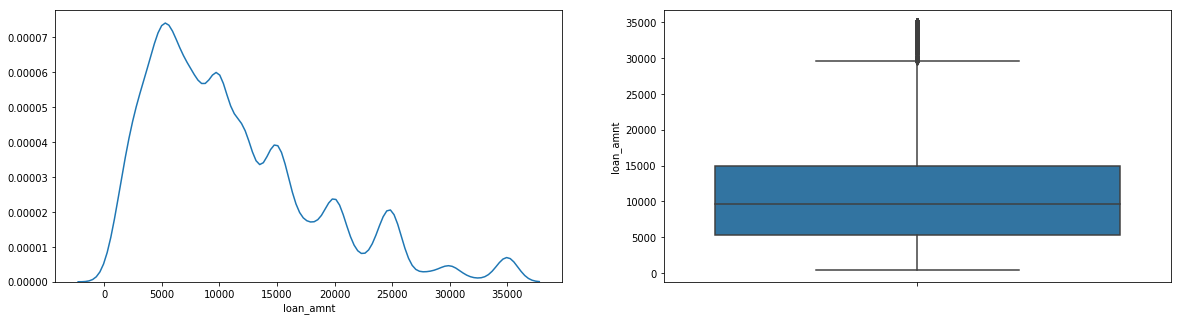

In [57]:
#Checking the loan amount spread 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(loan_set["loan_amnt"],hist=False)
plt.subplot(1,2,2)
sns.boxplot(y = loan_set["loan_amnt"])

In [58]:
loan_set["loan_amnt"].describe(percentiles = [0.01,0.25,0.50,0.75,0.90,0.95,0.99])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
1%        1200.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [59]:
loan_set["loan_amnt"].median()

9600.0

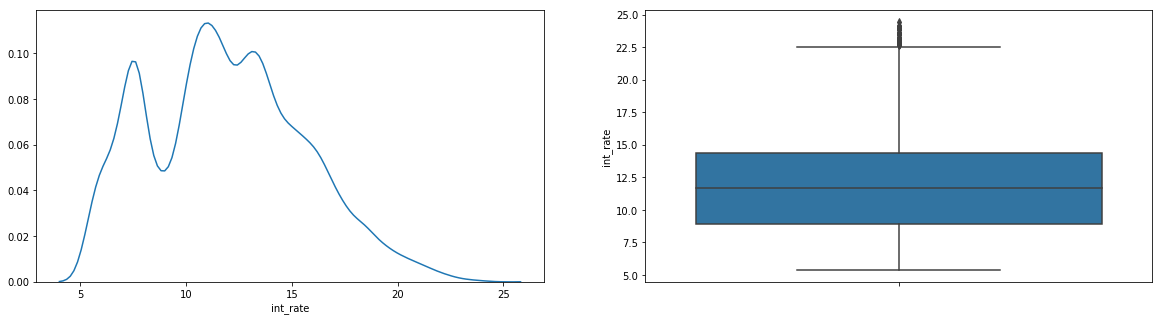

In [60]:
#Checking the spread of int_rate
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(loan_set["int_rate"],hist = False)
plt.subplot(122)
sns.boxplot(y = loan_set["int_rate"])

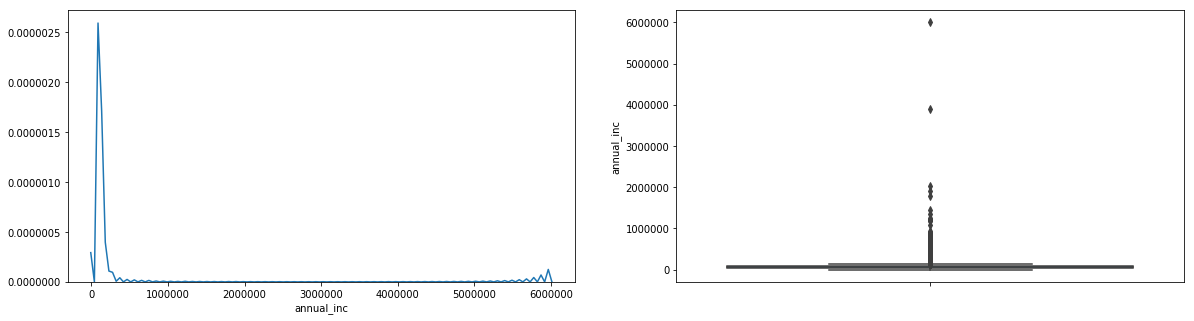

In [61]:
#Checking the spread of Annual Income
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(loan_set[ 'annual_inc'],hist = False)
plt.subplot(122)
sns.boxplot(y = loan_set[ 'annual_inc'])

#### Since the annual income is right skewed lets analyze by taking log function to get better understanding

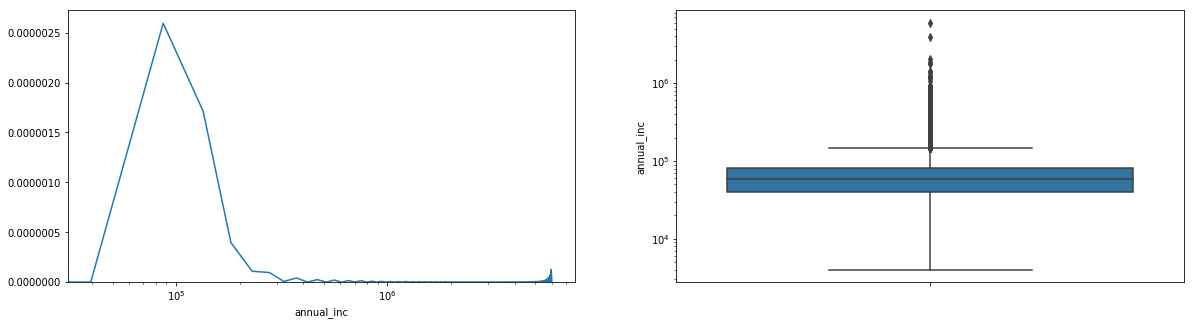

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(loan_set["annual_inc"],hist=False)
plt.xscale("log")
plt.subplot(1,2,2)
sns.boxplot(y = loan_set["annual_inc"])
plt.yscale("log")

#### Converting annual income to bins and also outliers are observed in annual income

In [63]:
 #Describing Annual income
round(loan_set[ 'annual_inc'].describe(percentiles=[0.01,0.25,0.50,0.75,0.80,0.90,0.95,0.99]))

count      38577.0
mean       68778.0
std        64219.0
min         4000.0
1%         14400.0
25%        40000.0
50%        58868.0
75%        82000.0
80%        90000.0
90%       115000.0
95%       140004.0
99%       234144.0
max      6000000.0
Name: annual_inc, dtype: float64

In [64]:
loan_set[ 'annual_inc'].median()

58868.0

Creating bins for annual income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

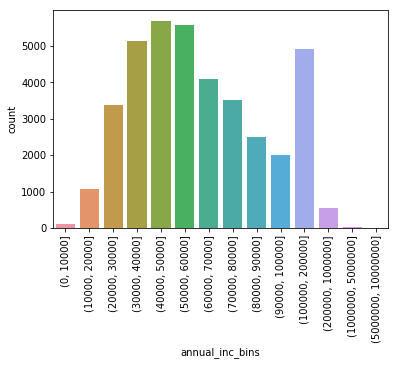

In [65]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000,1000000,5000000,10000000]
loan_set["annual_inc_bins"]=pd.cut(loan_set["annual_inc"],bins=bins)
sns.countplot(loan_set["annual_inc_bins"])
plt.xticks(rotation = 90)

In [66]:
#Checking the null s in the new annual income bins column
loan_set["annual_inc_bins"].isnull().sum()

0

In [67]:
loan_set["annual_inc_bins"].value_counts()

(40000, 50000]         5691
(50000, 60000]         5572
(30000, 40000]         5147
(100000, 200000]       4911
(60000, 70000]         4096
(70000, 80000]         3525
(20000, 30000]         3371
(80000, 90000]         2510
(90000, 100000]        2004
(10000, 20000]         1082
(200000, 1000000]       556
(0, 10000]               98
(1000000, 5000000]       13
(5000000, 10000000]       1
Name: annual_inc_bins, dtype: int64

#### Creating bins for Interest rate

In [68]:
loan_set["int_rate"].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

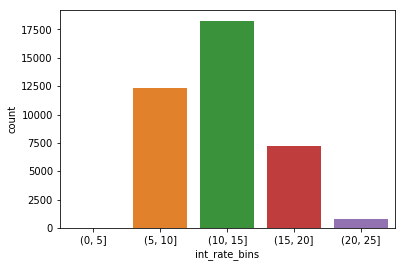

In [69]:
bins_int = [0,5,10,15,20,25]
loan_set["int_rate_bins"] = pd.cut(loan_set["int_rate"],bins_int)
sns.countplot(loan_set["int_rate_bins"])

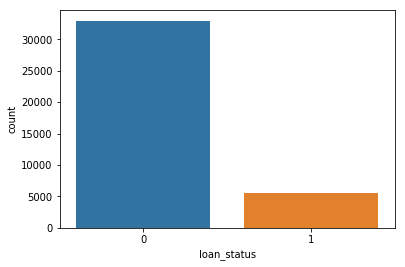

In [70]:
#Checking the no.of charged loan
sns.countplot(loan_set['loan_status'])

### Below analysis on the categorical variables shows most coverage as below
- Grades A,B,C 
- Debt_consolidation and credit card
- Rent and Mortgage home ownership
- Employee length 10+ and less than 3years

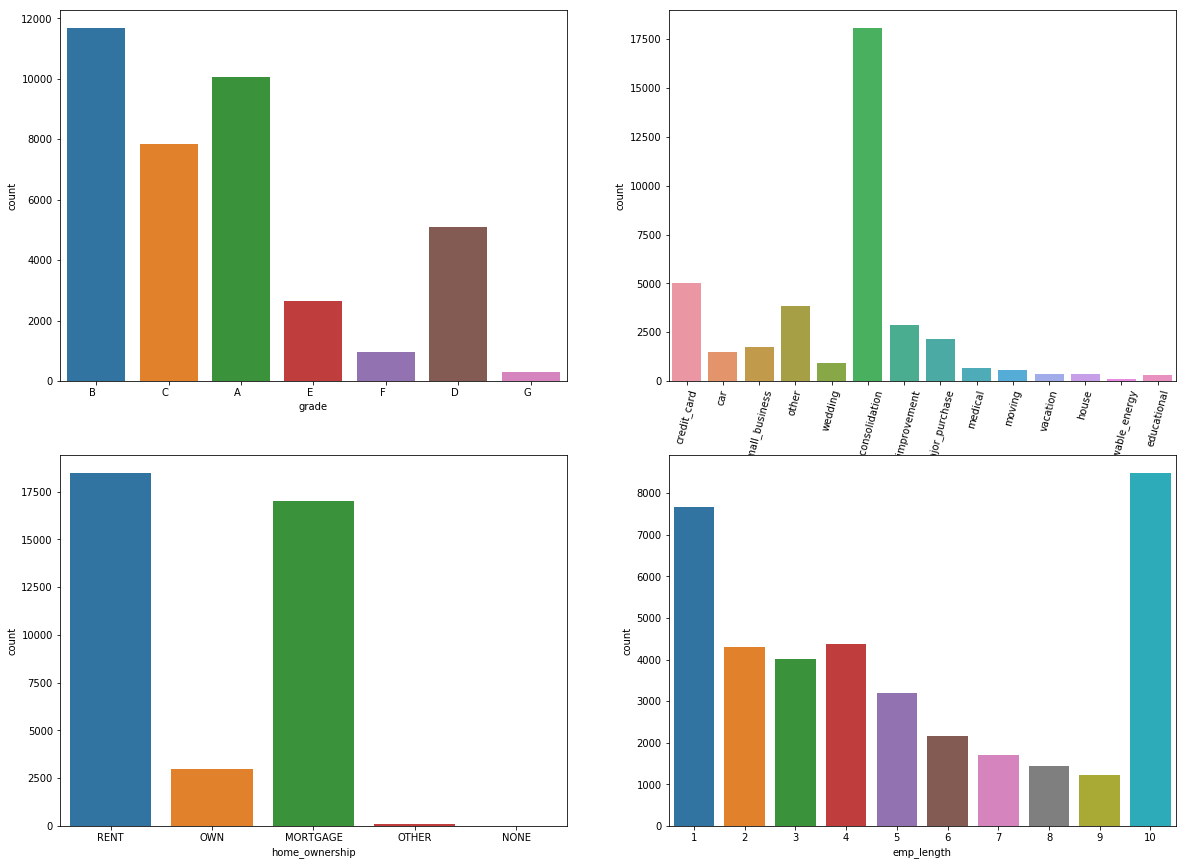

In [71]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(loan_set['grade'])
plt.xticks(horizontalalignment='right')
plt.subplot(2,2,2)
sns.countplot(loan_set['purpose'])
plt.xticks(rotation=75)
plt.subplot(2,2,3)
sns.countplot(loan_set['home_ownership'])
plt.subplot(2,2,4)
sns.countplot(loan_set['emp_length'])

#### Creating bins for dti.

In [72]:
loan_set["dti"].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [73]:
bins_dti = [0,5,10,15,20,25,30]
loan_set["dti_bins"] = pd.cut(loan_set["dti"],bins=bins_dti)
loan_set["dti_bins"].value_counts()

(10, 15]    9630
(15, 20]    8811
(5, 10]     7873
(20, 25]    6578
(0, 5]      4884
(25, 30]     623
Name: dti_bins, dtype: int64

## Bivariate analysis with loan_status

#### From the below correlation plot we an observe that 
- loan amount,funded amount,funded amount investor,installment are positively correlated 
- dti and annual income and also pub_rec_bankruptcies and annual income are negatively correlated

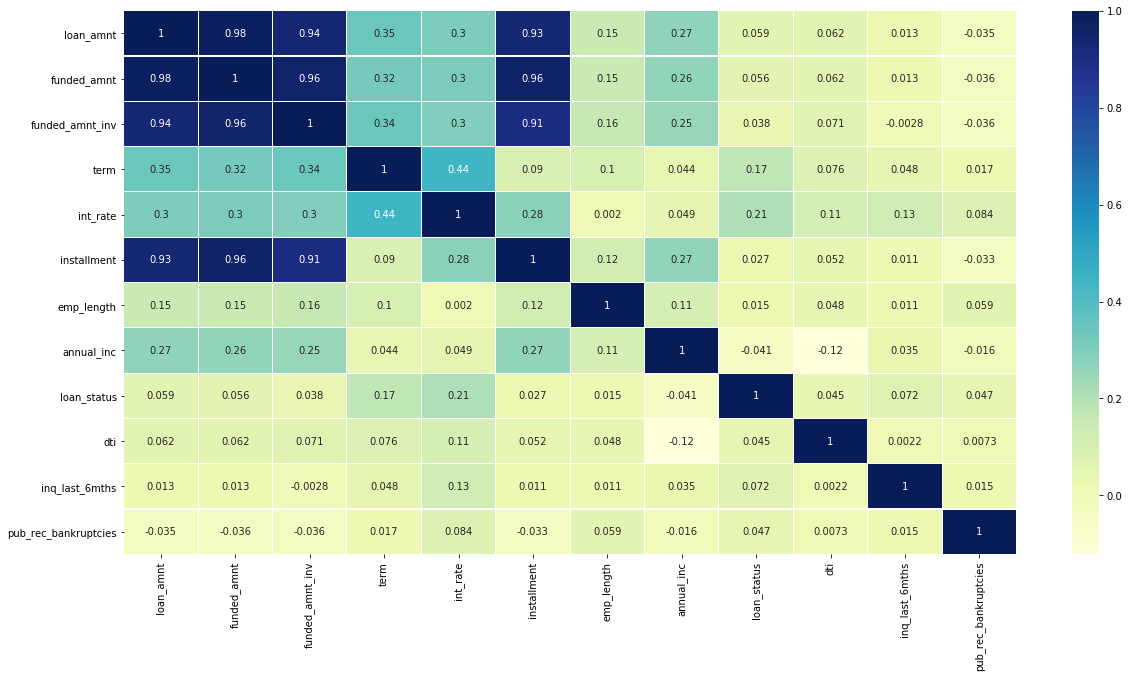

In [74]:
cor = loan_set.corr()
plt.figure(figsize = (20,10))
sns.heatmap(cor,annot=True,cmap="YlGnBu",linewidths=0.2)

#### Understanding the relattion between annual income and loan amount

#### From the below below graph we can infer that most of the charged off loans have funded amount by investors is less than the requested loan amount.

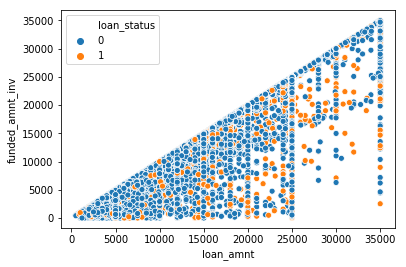

In [75]:
sns.scatterplot(x=loan_set['loan_amnt'],y=loan_set[ 'funded_amnt_inv'],hue = loan_set['loan_status'])

#### Calculating a column called diff_loan_amnt by subtracking the amount requested and amount granted by investor

In [76]:
loan_set["diff_loan_amnt"]=loan_set['loan_amnt'] - loan_set[ 'funded_amnt_inv']

In [77]:
loan_set["diff_loan_amnt"].describe(percentiles = [0.25,0.50,0.75,0.80,0.90,0.95])

count    38577.000000
mean       824.544306
std       2552.115899
min          0.000000
25%          0.000000
50%          6.003618
75%        225.000000
80%        293.743844
90%       2074.222011
95%       6150.000000
max      32474.996081
Name: diff_loan_amnt, dtype: float64

In [78]:
loan_set["diff_loan_amnt"].median()

6.003617999999733

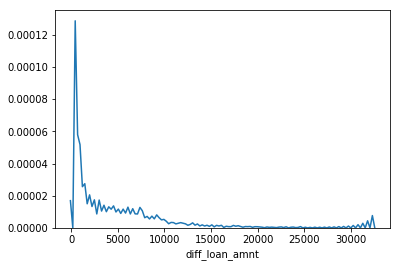

In [79]:
sns.distplot(loan_set["diff_loan_amnt"],hist=False)

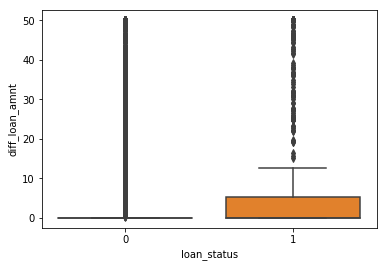

In [80]:
sns.boxplot(x=loan_set["loan_status"],y=loan_set.loc[(loan_set["diff_loan_amnt"] <=50),"diff_loan_amnt"])

#### Understanding the highly correlated variable using pairplot and their relation with loan_status.
#### From the below pairplot we can clearly understand that total payment received compared to loan amount is very less for the charged off loans

<Figure size 4320x4320 with 0 Axes>

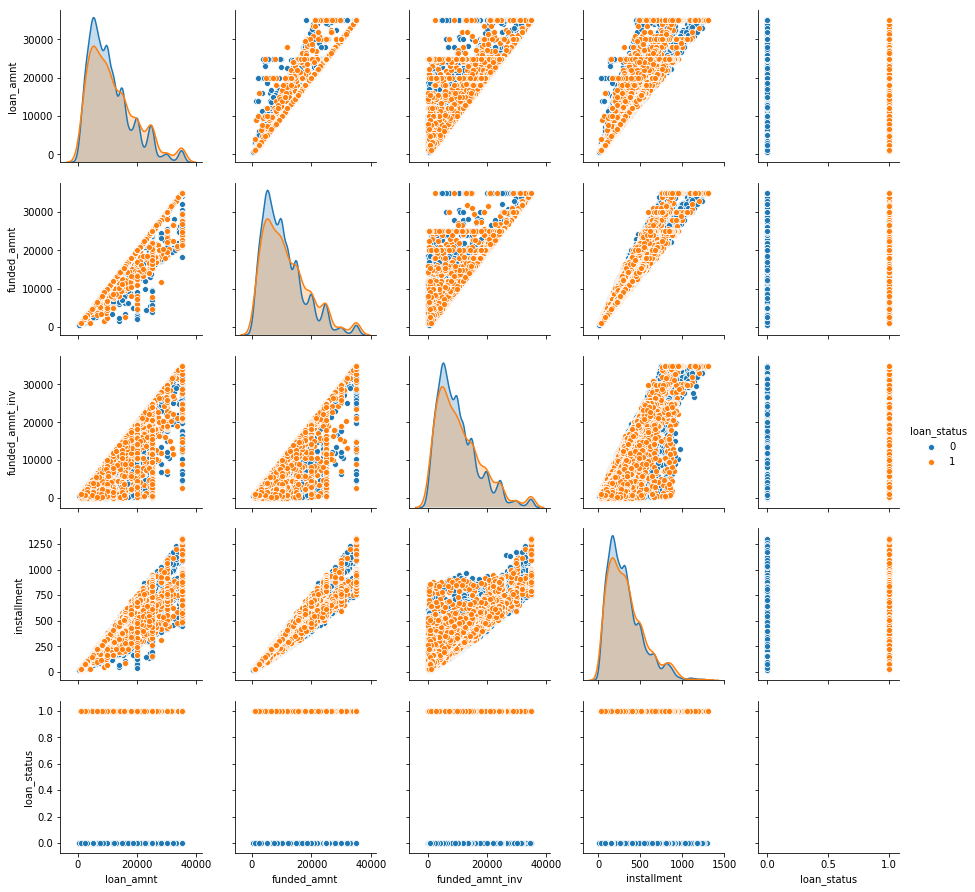

In [81]:
#Checking the relation between loan amount and funded amount which are highly correlated in heat map
plt.figure(figsize = (60,60))
sns.pairplot(data = loan_set.loc[:,['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment',"loan_status"]],hue="loan_status")

#### From the below calulation we can clearly understand that 
- 25% of "Small business" are unable to pay the loan
- 15% of 'debt consolidation' are also charged off where as over all more than 50% loans belong to debt consolidation

In [82]:
loan_set["purpose"].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [83]:
p = (round((loan_set.loc[(loan_set["loan_status"]==1),"purpose"].value_counts()/loan_set["purpose"].value_counts()*100),2)).reset_index()
p.sort_values(by="purpose",ascending = False)

,index,purpose
11,small_business,27.08
10,renewable_energy,18.63
3,educational,17.23
9,other,16.38
5,house,16.08
8,moving,15.97
7,medical,15.57
2,debt_consolidation,15.33
12,vacation,14.13
4,home_improvement,12.07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

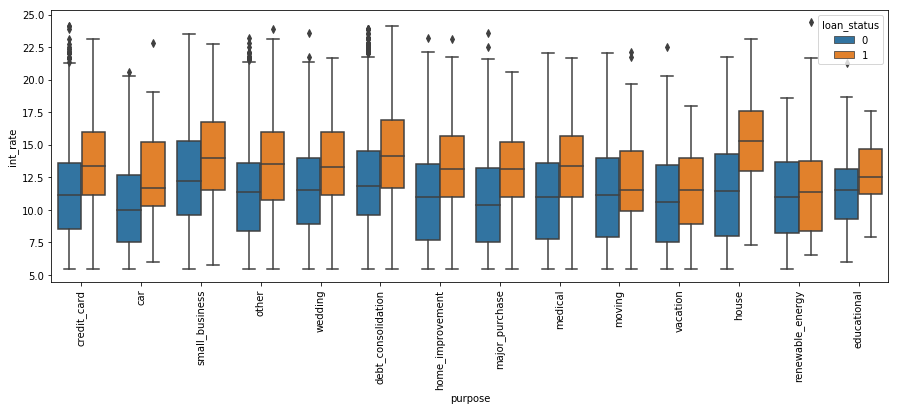

In [84]:
plt.figure(figsize = (15,5))
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data=loan_set)
plt.xticks(rotation=90)

#### Higher the DTI, we can analyse that median of charged off loans is high, which can be understood from below graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

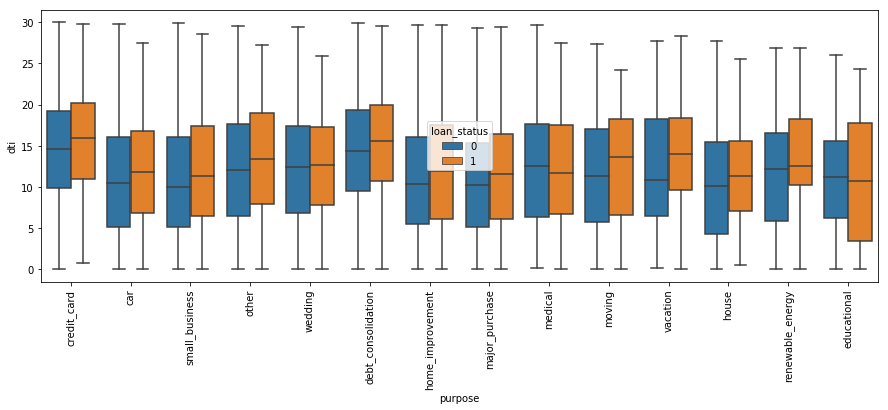

In [119]:
plt.figure(figsize = (15,5))
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan_set)
plt.xticks(rotation=90)

#### The median and Q3 quartile is higher for charged off loan status below. And Q1 starts approximately from median of Fully Paid status
#### Higher the interest rates higher the chances for charged off loans

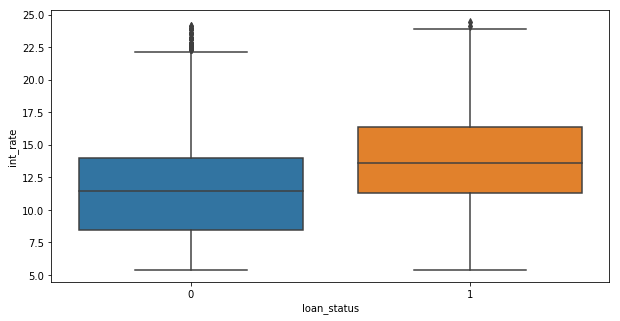

In [85]:
plt.figure(figsize = (10,5))
sns.boxplot(x='loan_status', y='int_rate', data=loan_set)

In [86]:
loan_set["int_rate_bins"].value_counts()

(10, 15]    18265
(5, 10]     12316
(15, 20]     7226
(20, 25]      770
(0, 5]          0
Name: int_rate_bins, dtype: int64

In [87]:
int_rate_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),'int_rate_bins'].value_counts()/loan_set['int_rate_bins'].value_counts()*100),2)).reset_index()
int_rate_percent.sort_values(by='int_rate_bins',ascending = False)

,index,int_rate_bins
4,"(20, 25]",38.44
3,"(15, 20]",24.83
2,"(10, 15]",14.82
1,"(5, 10]",6.74
0,"(0, 5]",NaN


#### Analysis of Charged off loans based on the annual income bins. We can understand that people having annual income less than 50000 are having charged off loans more compared to others

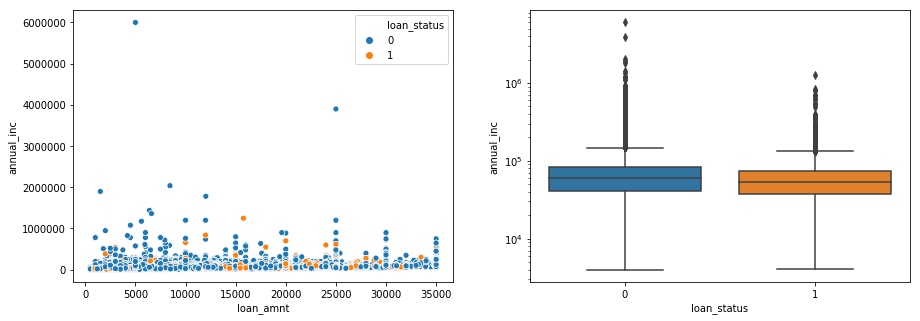

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=loan_set['loan_amnt'],y=loan_set[ 'annual_inc'],hue = loan_set['loan_status'])
plt.subplot(1,2,2)
sns.boxplot(x = loan_set["loan_status"],y=loan_set["annual_inc"])
plt.yscale("log")

In [89]:
annual_inc_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),'annual_inc_bins'].value_counts()/loan_set['annual_inc_bins'].value_counts()*100),2)).reset_index()
annual_inc_percent.sort_values(by='annual_inc_bins',ascending = False)

,index,annual_inc_bins
0,"(0, 10000]",20.41
1,"(10000, 20000]",20.06
2,"(20000, 30000]",17.86
3,"(30000, 40000]",17.72
5,"(50000, 60000]",15.56
4,"(40000, 50000]",15.15
6,"(60000, 70000]",13.65
7,"(70000, 80000]",13.19
8,"(80000, 90000]",12.15
9,"(90000, 100000]",11.28


#### From the below analysis it is clear that the loans given to grade G & F are having high cases of "Charged Off" loans compared to other grades.

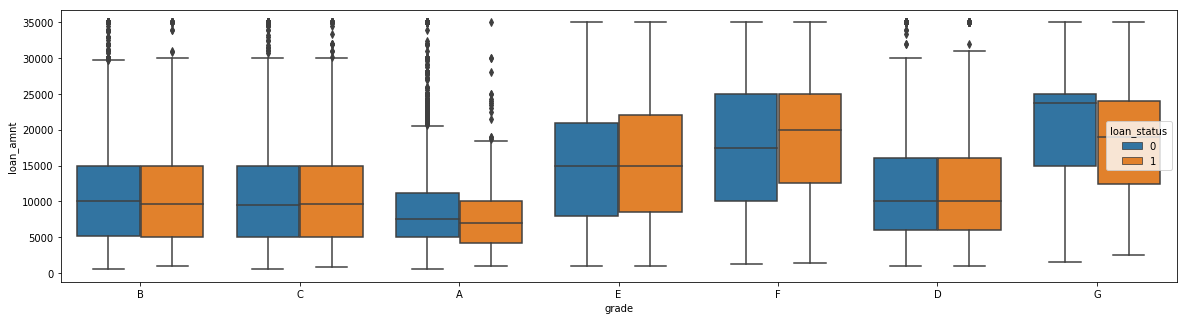

In [90]:
#Checking the loan amount spread across various grades
plt.figure(figsize = (20,5))
sns.boxplot(x="grade",y="loan_amnt",hue="loan_status",data=loan_set)

In [91]:
loan_set["grade"].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

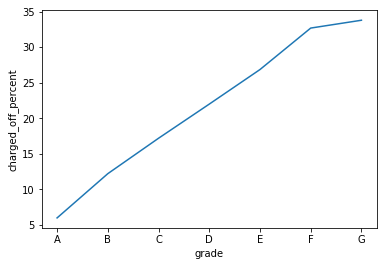

In [92]:
grade_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"grade"].value_counts()/loan_set["grade"].value_counts()*100),2)).reset_index(name="charged_off_percent")
grade_percent = grade_percent.rename(columns = {'index':"grade"})
sns.lineplot(x="grade",y="charged_off_percent",data = grade_percent)

In [93]:
grade_percent.sort_values(by="charged_off_percent",ascending = False)

,grade,charged_off_percent
6,G,33.78
5,F,32.68
4,E,26.85
3,D,21.99
2,C,17.19
1,B,12.21
0,A,5.99


#### Emp_length has been imputed with median of 4. From the below analysis we can infer that across the emp_length the charged off loan percent almost remains the same

In [94]:
emp_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"emp_length"].value_counts()/loan_set["emp_length"].value_counts()*100),2)).reset_index(name="charged_off_percent")
emp_percent = emp_percent.rename(columns = {'index':"emp_length"})
emp_percent.sort_values(by="charged_off_percent",ascending = False)

,emp_length,charged_off_percent
2,4,15.77
0,10,15.68
7,7,15.37
5,5,14.34
1,1,14.26
6,6,14.16
8,8,14.15
4,3,13.83
3,2,13.21
9,9,12.89


#### Checking the percentages of Charged_off loans based on home_owner ship. The home owner ship having "RENT" have high percent of charged off loans. 

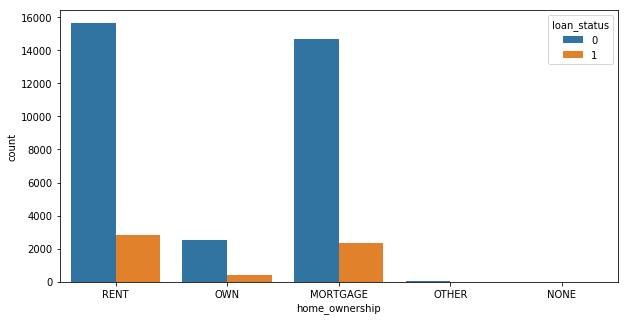

In [95]:
plt.figure(figsize = (10,5))
sns.countplot(loan_set['home_ownership'], hue=loan_set['loan_status'])

In [96]:
loan_set.groupby(["home_ownership","loan_status"]).size()

home_ownership  loan_status
MORTGAGE        0              14694
                1               2327
NONE            0                  3
OTHER           0                 80
                1                 18
OWN             0               2532
                1                443
RENT            0              15641
                1               2839
dtype: int64

In [97]:
home_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"home_ownership"].value_counts()/loan_set["home_ownership"].value_counts()*100),2)).reset_index(name="charged_off_percent")
home_percent = home_percent.rename(columns = {'index':"home_ownership"})
home_percent.sort_values(by="charged_off_percent")

,home_ownership,charged_off_percent
0,MORTGAGE,13.67
3,OWN,14.89
4,RENT,15.36
2,OTHER,18.37
1,NONE,NaN


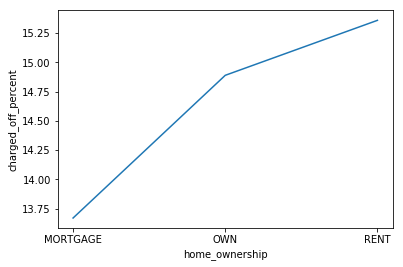

In [98]:
sns.lineplot(x="home_ownership",y="charged_off_percent",data = home_percent.loc[home_percent["home_ownership"]!="OTHER"])

#### From the below analysis we can understand that verification status is not playing an important role in deciding the loan status

In [99]:
loan_set.groupby(["verification_status","loan_status"]).size()

verification_status  loan_status
Not Verified         0              14552
                     1               2142
Source Verified      0               8243
                     1               1434
Verified             0              10155
                     1               2051
dtype: int64

In [100]:
verify_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"verification_status"].value_counts()/loan_set["verification_status"].value_counts()*100),2)).reset_index(name="charged_off_percent")
verify_percent = verify_percent.rename(columns = {'index':"verification_status"})
verify_percent.sort_values(by="charged_off_percent",ascending = False)

,verification_status,charged_off_percent
1,Verified,16.80
2,Source Verified,14.82
0,Not Verified,12.83


#### Analysis of Charged Off loans based on dti_bins.

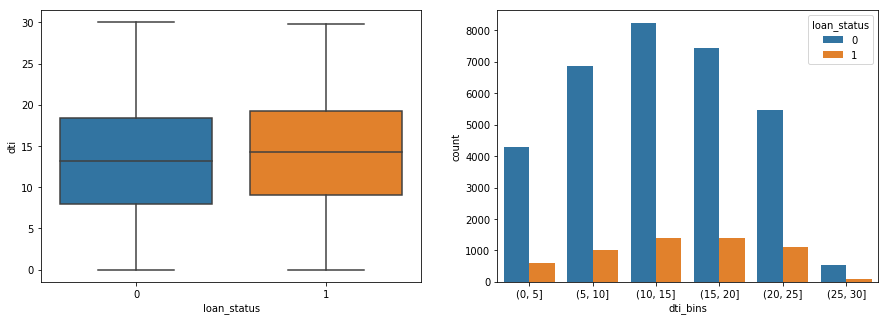

In [101]:
# Understanding the relation between loan_status and dti
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=loan_set["dti"],x=loan_set["loan_status"])
plt.subplot(1,2,2)
sns.countplot(x=loan_set["dti_bins"],hue = loan_set["loan_status"])

In [102]:
dti_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"dti_bins"].value_counts()/loan_set["dti_bins"].value_counts()*100),2)).reset_index(name="charged_off_percent")
dti_percent.sort_values(by='charged_off_percent',ascending = False)

,index,charged_off_percent
4,"(20, 25]",17.00
3,"(15, 20]",15.76
2,"(10, 15]",14.56
5,"(25, 30]",13.96
1,"(5, 10]",12.77
0,"(0, 5]",12.22


Understandin the term and loan status. From the below analysis we can understand that 22% of loans having 60 months term are charged off compared to 36 months term. Also the median of loan amount for charged off loans is higher than Fully paid loans.

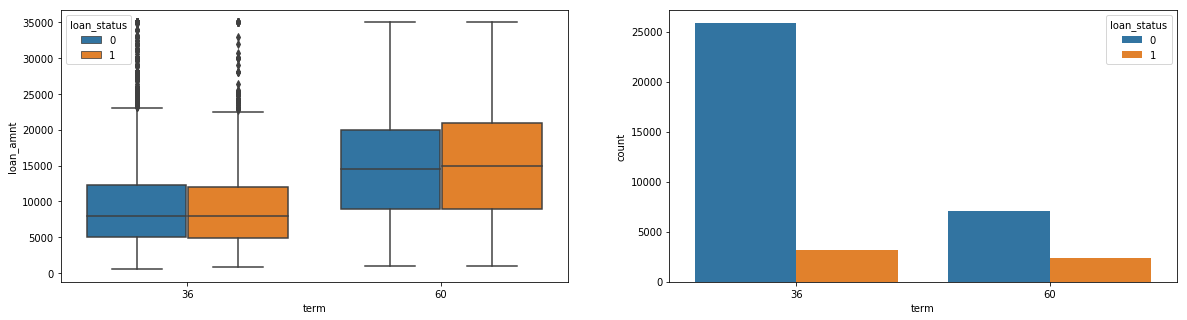

In [103]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(x="term",y="loan_amnt",hue="loan_status",data = loan_set)
plt.subplot(1,2,2)
sns.countplot(loan_set['term'], hue=loan_set['loan_status'])

In [104]:
term_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"term"].value_counts()/loan_set["term"].value_counts()*100),2)).reset_index(name="charged_off_percent")
term_percent

,index,charged_off_percent
0,36,11.09
1,60,25.31


#### From the below boxplot it is clear that the enquires made for charged off loans are high compared to other loans

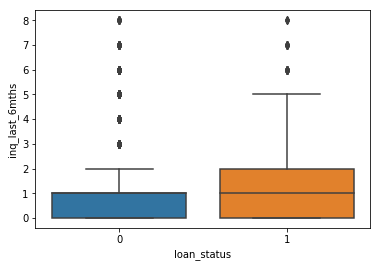

In [105]:
# Understanding the relation between loan_amnt and inq_last_6mths
sns.boxplot(y=loan_set["inq_last_6mths"],x=loan_set["loan_status"])

#### Analysis of loans based on state.

In [106]:
#There are 50 unique states.
loan_set["addr_state"].nunique()

50

#### Fetching the value counts for each state and checking the charged off loans which are having minimum 500 loans sanctioned

In [107]:
states = loan_set["addr_state"].value_counts().reset_index(name = 'state_loan_count')
states = states[states["state_loan_count"]>=500]
states["index"]

0     CA
1     NY
2     FL
3     TX
4     NJ
5     IL
6     PA
7     VA
8     GA
9     MA
10    OH
11    MD
12    AZ
13    WA
14    CO
15    NC
16    CT
17    MI
18    MO
19    MN
Name: index, dtype: object

In [108]:
state_percent = (round((loan_set.loc[(loan_set["loan_status"]==1) & (loan_set["addr_state"].isin(states["index"])),"addr_state"].value_counts()/loan_set["addr_state"].value_counts()*100),2)).reset_index(name="charged_off_percent")
state_percent.sort_values(by="charged_off_percent",ascending = False).head(10)

,index,charged_off_percent
9,FL,18.12
24,MO,17.01
4,CA,16.19
20,MD,15.84
10,GA,15.82
46,WA,15.53
30,NJ,15.53
27,NC,15.20
22,MI,14.63
3,AZ,14.49


#### From the below analysis we can understand that higher bankruptcies has more chances of loan not being paid.

In [109]:
loan_set.groupby(["pub_rec_bankruptcies","loan_status"]).size()

pub_rec_bankruptcies  loan_status
0.0                   0              31676
                      1               5259
1.0                   0               1271
                      1                366
2.0                   0                  3
                      1                  2
dtype: int64

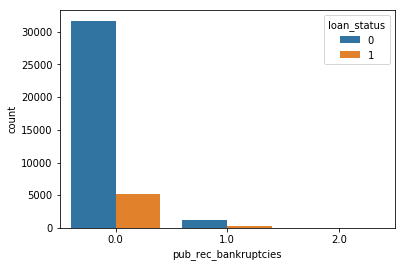

In [110]:
sns.countplot(x=loan_set["pub_rec_bankruptcies"],hue=loan_set["loan_status"])

In [111]:
pub_rec_bank_percent = (round((loan_set.loc[(loan_set["loan_status"]==1),"pub_rec_bankruptcies"].value_counts()/loan_set["pub_rec_bankruptcies"].value_counts()*100),2)).reset_index(name="charged_off_percent")
pub_rec_bank_percent.sort_values(by='charged_off_percent',ascending = False)

,index,charged_off_percent
2,2.0,40.00
1,1.0,22.36
0,0.0,14.24


#### Analysis of charged off loans based on issued year.Loans given in the year 2007,2011,2008 are having charged off loans little more than other years

In [112]:
loan_set["issue_d"].dt.year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d, dtype: int64

In [113]:
loan_set["issue_year"] = loan_set["issue_d"].dt.year

In [114]:
year_percent = (round((loan_set.loc[(loan_set["loan_status"]==1) ,"issue_year"].value_counts()/loan_set["issue_year"].value_counts()*100),2)).reset_index(name="charged_off_percent")
year_percent.sort_values(by="charged_off_percent",ascending = False).head(10)

,index,charged_off_percent
4,2007,17.93
0,2011,15.87
3,2008,15.81
1,2010,12.88
2,2009,12.60


#### Analysis based on Zip code based on first character in zipcode. There is no much variance of can be observed for charged off loans based on zip code

In [115]:
l = loan_set["zip_code"].str[0].unique()

In [116]:
loan_set["zip_code"].str[0].value_counts()

9    8445
1    5267
3    4628
0    4236
2    3985
7    3600
8    2614
6    2396
4    2210
5    1196
Name: zip_code, dtype: int64

In [117]:
loan_set.loc[(loan_set["loan_status"]==1) ,"zip_code"].str[0].unique()

array(['3', '9', '7', '2', '1', '4', '6', '5', '8', '0'], dtype=object)

In [118]:
state_percent = (round((loan_set.loc[(loan_set["loan_status"]==1) ,"zip_code"].str[0].value_counts()/loan_set["zip_code"].str[0].value_counts()*100),2)).reset_index(name="charged_off_percent")
state_percent.sort_values(by="charged_off_percent",ascending = False).head(10)

,index,charged_off_percent
3,3,16.90
9,9,16.16
8,8,15.38
6,6,14.40
5,5,13.96
2,2,13.93
0,0,13.88
4,4,13.71
1,1,12.99
7,7,12.11
